In [ ]:
## improve performance - use smaller network/ different network;
#                  add dropout; reduce no. of dropout instances (?); reduce dropout value
#               remove kernel_initializer

# transfer learning with images saved as RGB - also look up image size to be used
# try smaller network instead of VGG16
# use fastai & find region of interest


# how to do data augmentation (with all classes), when using transfer learning?


# add performance metrics other than accuracy - would need y_test & y_pred values - how to get?
# how to obtain the probabilities on test images, when using DataGenerator? 
# how to see 'perf.' output on test set


## add colab; & check for all classes 
# loading image data from single file instead of directory; check on colab


# understand the no. of parameters in each layer of a model (as we move forward, image size decreases, #channels increases)
# check the no. of parameters (trainable & untrainable) for transfer learning


# sparseConvNet; check kaggle code  (# check kaggle kernels for ~eco-taxa data)
# check kaggle data - no. of entries in each class - is there data imbalance?



# https://machinelearningmastery.com/image-augmentation-deep-learning-keras/
# https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html


# settle on no. of classes : confusion understanding taxonomic tree(?) - file inventory.txt
#   see what was used in paper (108, excluding 12 rare taxa) - check if classes reported (see kaggle data ****)
#                      & reported accuracy (>90%, recall: 40%, precision: 84%)
## SEE SUPPLEMENTARY !!!



#########################################################################################################
#########################################################################################################
# EcoTaxa data: classification of Plankton
# data source: https://www.seanoe.org/data/00446/55741/
# http://marine-imaging-workshop.com/documents/miw17/presentations/public/MIW17_Poster_MarcPicheral.pdf


## total no. of images (EcoTaxa data): 1433278  (~1.4 million)
# the paper talks of 24M images

###########################################################################################
### PROBLEM STATEMENT ###
# 1. build a classifier to classify images
# 2. see if the classifier can point out 'new' classes, not present in the training data (class, junk, other) ****
#     finding new classes :
#           i) see if probability is less for all the known classes
#           ii) use some similarity metric to the other classes (e.g. triplet loss?) ?
# 3. comparison of features performance: conventional vs deep-learning based ***


#### papers ####
#https://www.frontiersin.org/articles/10.3389/fmars.2019.00196/full  (review, Apr. 2019) -> understand features used **


#########################################################################################
#### CHALLENGES: ####

# 1. substantial re-training of pre-trained networks (transfer learning)
#   or new network for gray-scale images?
#          -> find image size corresponding to the pre-trained network used
## TRY BOTH?
# what happens if we i) pad the images vs ii) don't pad the images



# 2. design of model & loss function suited to task  
# https://www.kaggle.com/iafoss/pretrained-resnet34-with-rgby-0-460-public-lb



# 3.  check data set size; handling class imbalance for image data (check for imbalance) ***

# combine classes in similar taxa -> low within-class variance  (check images for grouped classes - are they similar?)
# different classes have different no. of examples - use taxonomic tree to group

#    check total no. of classes, depth of each class (can classify at shallower level using taxonomic tree)
# select the level to do the classification at (this decides the no. of classes)

#         --> try with 2-3 classes first

# augment data (crop, translate, rotate, flip)
# HOW TO HANDLE LARGE IMBALANCE AMONG DIFFERENT CLASSES - IS AUGMENTATION ENOUGH? OR REDUCE NO. OF IMAGES SELECTED?
#  Luo et al, 2018 talks of different works - 4-class classification, 47 classes, 114 classes

# - all classes should be represented at each batch - how to ensure this?

# this should be an N-class classifier (instead of level-wise one-vs-rest)




# 4. handling outlier data?


# 5. are all images of same size? are they captured on same scale?  ***
# are all images of same size (height & width)? -> no
# are they captured on same scale (magnification)? -> no idea
# use Fiji/ ImageJ to check metadata of image (use voxel size? any other parameter) ****



# 6. handling large no. of classes (classification performance metric); one-hot encode classes - which to use?
# LabelEncoder() ; OneHotEncoder() ; LabelBinarizer() ; to_categorical (keras.utils)
# https://stackoverflow.com/questions/50473381/scikit-learns-labelbinarizer-vs-onehotencoder
# GOOGLE: label binarizer vs to categorical



# 7. libraries to load & see image data
# PIL/ Pillow vs openCV - which one to use?




# 8. data pre-processing: is it necessary to create separate folders for train & test? ***
# either create separate folders with the pre-processed images (suitable for large no. of images), 
# or
# save the pre-processed images as numpy arrays and load them for quick processing (suitable for less no. of images,
# or smaller images).
# before pre-processing, shuffle the images. From here, train, test & val splits should be created.

# In the former case, use ImageDataGenerator & flow_from_directory commands to load the images
# (both scaled; with augmentation for training & without aug. for validation) & automatically read classes
# in 2nd case, save the labels also as a separate file.



# 9. train-test data split
# ideally, use train, validation & test sets


# 10. input shape (flatten image?); see how it should be fed into network ***
#     (k x k x C, where k: image dimension, C: np. of channels)
# see channel first (theano) vs channel last (tensorflow) conventions
# also, the batch of images may sometimes be mentioned

# how should the image info be saved & passed to the cnn for training? -> save flattened pixel values as features in csv file
## re-shaping tha data for input to conv net
# https://stackoverflow.com/questions/43235531/convolutional-neural-network-conv1d-input-shape
# http://localhost:8888/notebooks/Desktop/data/HEALTHCARE/EEG/code/GPU_run_CNN/EEG_Classification_CNN_3patients_GPU.ipynb



# 11. handle overfitting , use of batches (batch normalization) & epochs,
#       early stopping,
#       data augmentation (different techniques: rotate, shift, zoom, crop, etc)
#      dropout regularization (different values)

# 12. choice of activation function (ReLU, softmax, etc),
#     loss function (MSE, categorical_crossentropy, etc), 
#     metric (acc., recall)

# 13. hyper-parameter tuning: learning rate (else, adaptive learning rate like Adam), optimizer (Adam, SGD, etc)

# 14. how to apply scaling to intermediate layers


## is there a method to assess what is the best model that can be built from given data, in terms of metric values ?
## (metric values: RMSD for regresion, precision/recall for classification)



## activation function & vanishing gradient
## deep vs wide network (see excel: how no. of parameters changes)

In [ ]:
## RESOURCES
# sentdex youtube
# data camp
# pyimage
# machinelearningmastery

# https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/  
#     -> both array & file system load   
# https://machinelearningmastery.com/start-here/#better   ****
# https://machinelearningmastery.com/how-to-calculate-precision-recall-f1-and-more-for-deep-learning-models/
# https://machinelearningmastery.com/custom-metrics-deep-learning-keras-python/
# https://machinelearningmastery.com/image-augmentation-deep-learning-keras/
# https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/


# https://keras.io/preprocessing/image/       <- ImageDataGenerator
# https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html


# https://towardsdatascience.com/image-detection-from-scratch-in-keras-f314872006c9  -> gc command to clean memory

# https://www.pyimagesearch.com/2018/09/10/keras-tutorial-how-to-get-started-with-keras-deep-learning-and-python/  -> from file

# https://www.analyticsvidhya.com/blog/2019/01/build-image-classification-model-10-minutes/  -> Colab

In [ ]:
# output layer is fully connected layer (model.add(Dense(n, ...)))
# where n=1 for regression;  or,   n=no. of classes 
# for binary classifier, should it be 1 with sigmoid (machinelearningmastery), or 2 with softmax activation (datacamp) ?
# accordingly, under model.compile, loss should be binary_crossentropy or categorical_crossentropy (Classification)
#                                                mean_squared_error for regression


# for classification, should the labels be one-hot encoded?
# how to assign labels for multi-class classification


# input shape is specified in the first model.add layer
# images can be fed as numpy array, or from separate train test folders
# image pixels should be scaled
# apply transform for data augmentation, if required


# drop-out can be implemented after conv+pool block, & after fully connected (dense) block (except for last prediction layer) 
# learning rate is specified with optimizer under model.compile
# no. of epochs are specified in model.fit (increase epochs if both train & test loss continue to show downward trend w/o plateau)
# early stopping is specified in model.fit

In [ ]:
###############################################################################
# colab:  https://colab.research.google.com/notebooks/io.ipynb#scrollTo=7taylj9wpsA2

# any code to automate the download of data to google colab, & run codes there?  ***
# https://www.analyticsvidhya.com/blog/2019/01/build-image-classification-model-10-minutes/  -> Colab

In [ ]:
# Setting up Colab
!pip install PyDrive

In [ ]:
# importing necessary libraries
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
#  create a drive variable to access Google Drive:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# To download the dataset, we will use the ID of the file uploaded on Google Drive
# Replace the id and filename in the below codes
download = drive.CreateFile({'id': '1ZCzHDAfwgLdQke_GNnHp_4OheRRtNPs-'})
download.GetContentFile('Train_UQcUa52.zip')
!unzip Train_UQcUa52.zip

In [ ]:
################################################################################

In [3]:
import sys
print(sys.executable)  # prints location of executable
print('')
print(sys.version)   # prints python version

C:\Users\DAR9KOR\AppData\Local\Continuum\anaconda3\envs\deep_learn\python.exe


In [1]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline

import gc  # garbage collector

from random import seed
from random import random
# seed random number generator
seed(1)

In [2]:
from PIL import Image  # Utilities to read and write images in various formats.
import imageio     ## are both imageio & Pillow (PIL) required ?
#import pathlib   # alternate to os.path

In [3]:
#import keras

In [53]:
'''link2 = Link[~Link["Lineage"].str.contains('|'.join(['not-living', '/living/other/']))]

# not living -> has 2 or 3 levels
# living/other -> has 3 levels
# living/eukaryote/... -> min 6 levels,max 15 levels

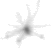

In [10]:
# upload the data & check some images; 

'''im_path = pathlib.Path('./57398/ZooScanSet/Imgs/Acantharea/42738931.jpg')  #.glob('*/images/*.png')
display(Image.open(im_path))  
# https://stackoverflow.com/questions/11854847/how-can-i-display-an-image-from-a-file-in-jupyter-notebook
# how to open an image in jupyter notebook
# https://www.quora.com/How-do-I-load-multiple-images-in-Jupyter-Notebook-for-a-neural-network-classifier


#training_paths = pathlib.Path('../input/stage1_train').glob('*/images/*.png')
#training_sorted = sorted([x for x in training_paths])
#im_path = training_sorted[45]
#im = imageio.imread(str(im_path))

In [16]:
# total no. of images
'''len(path_sorted)

1433278

In [ ]:
############  DATA PREPROCESSING     ############

In [ ]:
# re-sizing images
#https://stackoverflow.com/questions/44231209/resize-rectangular-image-to-square-keeping-ratio-and-fill-background-with-black/44231784
# https://stackoverflow.com/questions/273946/how-do-i-resize-an-image-using-pil-and-maintain-its-aspect-ratio

# as we go deeper into the network, the image gets smaller; hence can't start with very small images
# see size to be used for pre-trained network (if) chosen

In [4]:
# pad the images to square & make (increase or decrease) a common size

#from PIL import Image
'''
def make_square(im, min_size=256, fill_color=(0, 0, 0, 0)):
    x, y = im.size
    size = max(min_size, x, y)
    new_im = Image.new('RGBA', (size, size), fill_color)
    new_im.paste(im, (int((size - x) / 2), int((size - y) / 2)))
    return new_im
'''

def make_square(im, min_size=200, fill_color=(255)):   #fill_color=(255, 255, 255, 0)  # fill_color=(255, 255, 255)
    # fill_color=(0, 0, 0, 0) <- black
    # fill_color=(255, 255, 255, 0) <- white
    x, y = im.size
    
    # make square image,
    if x != y:
        size = max(x, y)
        new_im = Image.new('L', (size, size), fill_color)   # Image.new('RGB',  #'RGBA' is not supported in jpg image
        new_im.paste(im, (int((size - x) / 2), int((size - y) / 2)))
        #imResize = new_im.resize((min_size,min_size), Image.ANTIALIAS)
    else:
        new_im = im
        # resize images
        #imResize = im.resize((min_size,min_size), Image.ANTIALIAS)
           
    return new_im


def im_resize(im, min_size=200):
    # https://www.daniweb.com/programming/software-development/code/216637/resize-an-image-python
    x, y = im.size
    
    if x > min_size:  # downsample
        imResize = im.resize((min_size,min_size), Image.ANTIALIAS)   # use of other options? cubic spline?
    elif x < min_size: # upsample
        imResize = im.resize((min_size, min_size), Image.BILINEAR)
    else:
        imResize = im
    
    return imResize

In [5]:
# do a trial run with selected folders -> Acantharea, Copilia, cypris

trial = pd.read_csv("C:/Users/DAR9KOR/Desktop/data/sample_datasets/EcoTaxa/57398/selected_files.csv")
trial.head(2)

,Unnamed: 0,Unnamed: 0.1,path,width,height
0,0,0,57398\ZooScanSet\Imgs\Acantharea\42738931.jpg,51,48
1,1,1,57398\ZooScanSet\Imgs\Acantharea\42745471.jpg,62,64


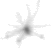

In [7]:
Image.open(str('./' + list(trial.path)[0]))

In [17]:
list(trial.path)[0].split("Acantharea\\")[1]

'42738931.jpg'

In [ ]:
# clear memory
# https://towardsdatascience.com/image-detection-from-scratch-in-keras-f314872006c9
del trial
gc.collect()

In [6]:
# data pre-processing: is it necessary to create separate folders for train & test?
# https://cs230-stanford.github.io/train-dev-test-split.html  -> check for split using image indices 

#               total images        train(90%)     test(10%)     Total
# Acantharea :   762                    686           76
# Copilia:       762                    686           76
# cypris:        702                    632           70
# TOTAL                                2004          222         2226


from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random

# create directories
dataset_home = './57398/ZooScanSet/runData/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
    # create label subdirectories
    labeldirs = ['Acantharea/', 'Copilia/', 'cypris/']
    for labldir in labeldirs:
        newdir = dataset_home + subdir + labldir
        makedirs(newdir, exist_ok=True)

# seed random number generator
seed(1)

# define ratio of pictures to use for validation
val_ratio = 0.1  # 0.25


# copy training dataset images into subdirectories
src_directory = './57398/ZooScanSet/Imgs/'  #'train/'


In [7]:
## create train, test & val folders
# also, need to update this code for automatically reading large number of classes

#for file in listdir(src_directory):
for filename in list(trial.path):
    #src = src_directory + '/' + file
    # decide train or test
    dst_dir = 'train/'
    if random() < val_ratio:
        dst_dir = 'test/'
    
    # apply image squaring & resizing
    im = Image.open(str('./' + filename))
    new_im = make_square(im)
    imResize = im_resize(new_im)
    
    '''if file.startswith('cat'):
		dst = dataset_home + dst_dir + 'cats/'  + file
		copyfile(src, dst)
	elif file.startswith('dog'):
		dst = dataset_home + dst_dir + 'dogs/'  + file
		copyfile(src, dst)'''
    
    if filename.find('Acantharea') != -1:
        newname = filename.split("Acantharea\\")[1]
        dst = dataset_home + dst_dir + 'Acantharea/' + newname
        imResize.save(dst)
    elif filename.find('Copilia') != -1:
        newname = filename.split("Copilia\\")[1]
        dst = dataset_home + dst_dir + 'Copilia/' + newname
        imResize.save(dst)
    elif filename.find('cypris') != -1:
        newname = filename.split("cypris\\")[1]
        dst = dataset_home + dst_dir + 'cypris/' + newname
        imResize.save(dst)


In [ ]:
# normalization of images?
# /Desktop/data/theory/CNN_deepLearning_part4/sahana_talk/Kaggle_FER2013_Colab-Copy1_CNN_talk.ipynb

In [ ]:
# handling outlier data?

In [ ]:
###########    MODEL BUILDING   #############

In [ ]:
# should not the no. of model parameters be less than the data available?

In [ ]:
# network to use: built new or previously available? 
# what was used for crystal image data: 
#    Conf. paper (gray scale) : crystalNet (conv-pool * 3 -> conv -> FC -> FC -> output)
#    google paper (color images): variant of Inception v3; (also tried Inception-ResNet-v2, NASNet)
#    arxiv paper :
# check applicability of existing CNN for gray-scale:
# LeNet-5 : for gray scale  -> https://www.analyticsvidhya.com/blog/2018/12/guide-convolutional-neural-network-cnn/

# custom CNN:
# https://www.analyticsvidhya.com/blog/2019/01/build-image-classification-model-10-minutes/
# https://towardsdatascience.com/a-simple-2d-cnn-for-mnist-digit-recognition-a998dbc1e79a

# trying different hyper-parameters
# https://www.kaggle.com/cdeotte/how-to-choose-cnn-architecture-mnist
# https://www.kaggle.com/cdeotte/25-million-images-0-99757-mnist

# use of transfer learning
#https://nbviewer.jupyter.org/github/tirthajyoti/Deep-learning-with-Python/blob/master/Notebooks/Transfer_learning_CIFAR.ipynb

# design of model & loss function suited to task  
# https://www.kaggle.com/iafoss/pretrained-resnet34-with-rgby-0-460-public-lb

In [3]:
## optimise the model parameters & hyperparameters: kernel initialiser & padding *********

import sys
#from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten, Dropout
from keras.optimizers import SGD, Adam
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.
C:\Users\DAR9KOR\AppData\Local\Continuum\anaconda3\envs\deep_learn\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\DAR9KOR\AppData\Local\Continuum\anaconda3\envs\deep_learn\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\DAR9KOR\AppData\Local\Continuum\anaconda3\envs\deep_learn\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np

In [7]:
# define cnn model
'''def define_model():
    model = Sequential()
    
    ## CHANGE INPUT SHAPE, BASED ON RGB OR GRAYSCALE
    # specify padding or not?
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 1)))
    
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    
    #model.add(Dense(1, activation='sigmoid'))  ## CHANGE HERE, BASED ON NO. OF CLASSES
    model.add(Dense(3, activation='softmax'))
    
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    #model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])  ## CHANGE HERE, BASED ON NO. OF CLASSES
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model'''

In [5]:
### model 1
model = Sequential()

## CHANGE INPUT SHAPE, BASED ON RGB OR GRAYSCALE
# specify padding or not?
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))

#model.add(Dense(1, activation='sigmoid'))  ## CHANGE HERE, BASED ON NO. OF CLASSES
model.add(Dense(3, activation='softmax'))

# compile model
opt = SGD(lr=0.001, momentum=0.9)
#model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])  ## CHANGE HERE, BASED ON NO. OF CLASSES
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


W1229 23:57:15.500962 12960 deprecation_wrapper.py:119] From C:\Users\DAR9KOR\AppData\Local\Continuum\anaconda3\envs\deep_learn\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1229 23:57:15.570394 12960 deprecation_wrapper.py:119] From C:\Users\DAR9KOR\AppData\Local\Continuum\anaconda3\envs\deep_learn\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1229 23:57:15.583571 12960 deprecation_wrapper.py:119] From C:\Users\DAR9KOR\AppData\Local\Continuum\anaconda3\envs\deep_learn\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1229 23:57:15.626925 12960 deprecation_wrapper.py:119] From C:\Users\DAR9KOR\AppData\Local\Continuum\anaconda3\envs\deep_learn\lib\site-packages\keras\backend\tensorflow_backe

In [6]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 200, 200, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 25, 25, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 80000)             0         
__________

In [4]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['acc'], color='blue', label='train')   # 'accuracy'
    plt.plot(history.history['val_acc'], color='orange', label='test')
    # save plot to file
    #filename = sys.argv[0].split('/')[-1]
    #pyplot.savefig(filename + '_plot.png')
    plt.close()

In [ ]:
## class_mode for multiclass?? ***** - check generator function
# any other way of setting up? try without generator; see how to lead from csv or directly from images; sahana code
#      classes will also need to be read in
#      also, randomisation in the order is required

# run the test harness for evaluating a model
'''def run_test_harness():
    
    # define model
    model = define_model()
    
    # create data generators
    train_datagen = ImageDataGenerator(rescale=1.0/255.0,
                                       width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    
    ## prepare iterators       ## CHANGE class_mode, BASED ON NO. OF CLASSES
    #train_it = train_datagen.flow_from_directory('dataset_dogs_vs_cats/train/',
    #                                             class_mode='binary', batch_size=64, target_size=(200, 200))
    #test_it = test_datagen.flow_from_directory('dataset_dogs_vs_cats/test/',
    #                                           class_mode='binary', batch_size=64, target_size=(200, 200))    
    train_it = train_datagen.flow_from_directory('./57398/ZooScanSet/runData/train/',
                                                 class_mode='categorical', batch_size=64, target_size=(200, 200))
    test_it = test_datagen.flow_from_directory('./57398/ZooScanSet/runData/test/',
                                               class_mode='categorical', batch_size=64, target_size=(200, 200))
    
    # fit model
    history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
                                  validation_data=test_it, validation_steps=len(test_it), epochs=50, verbose=1)
    # verbose can be 0,1,2; default is 1
    # https://stackoverflow.com/questions/47902295/what-is-the-use-of-verbose-in-keras-while-validating-the-model
    
    # evaluate model
    _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=1)
    print('> %.3f' % (acc * 100.0))
    
    # learning curves
    summarize_diagnostics(history)
    
run_test_harness()
'''

In [8]:
# define model
#model = define_model()


# with data augmentation : how much is this augmenting?
# create data generators
train_datagen = ImageDataGenerator(rescale=1.0/255.0,
                                   width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

## prepare iterators       ## CHANGE class_mode, BASED ON NO. OF CLASSES
#train_it = train_datagen.flow_from_directory('dataset_dogs_vs_cats/train/',
#                                             class_mode='binary', batch_size=64, target_size=(200, 200))
#test_it = test_datagen.flow_from_directory('dataset_dogs_vs_cats/test/',
#                                           class_mode='binary', batch_size=64, target_size=(200, 200))    
train_it = train_datagen.flow_from_directory('./57398/ZooScanSet/runData/train/', color_mode='grayscale',
                                             class_mode='categorical', batch_size=64, target_size=(200, 200))
test_it = test_datagen.flow_from_directory('./57398/ZooScanSet/runData/test/', color_mode='grayscale',
                                           class_mode='categorical', batch_size=64, target_size=(200, 200))



Found 2007 images belonging to 3 classes.
Found 219 images belonging to 3 classes.


In [9]:
# fit model
history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
                              validation_data=test_it, validation_steps=len(test_it), epochs=50, verbose=1)
# verbose can be 0,1,2; default is 1
# https://stackoverflow.com/questions/47902295/what-is-the-use-of-verbose-in-keras-while-validating-the-model


W1229 23:58:13.974874 12960 deprecation.py:323] From C:\Users\DAR9KOR\AppData\Local\Continuum\anaconda3\envs\deep_learn\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1229 23:58:14.233107 12960 deprecation_wrapper.py:119] From C:\Users\DAR9KOR\AppData\Local\Continuum\anaconda3\envs\deep_learn\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/50
32/32 [==============================] - 199s 6s/step - loss: 10.2217 - acc: 0.3450 - val_loss: 11.4814 - val_acc: 0.2877
Epoch 2/50
32/32 [==============================] - 183s 6s/step - loss: 10.4774 - acc: 0.3500 - val_loss: 11.4814 - val_acc: 0.2877
Epoch 3/50
32/32 [==============================] - 191s 6s/step - loss: 10.4230 - acc: 0.3533 - val_loss: 11.4814 - val_acc: 0.2877
Epoch 4/50
32/32 [==============================] - 182s 6s/step - loss: 10.4910 - acc: 0.3491 - val_loss: 11.4814 - val_acc: 0.2877
Epoch 5/50
32/32 [==============================] - 168s 5s/step - loss: 10.5182 - acc: 0.3474 - val_loss: 11.4814 - val_acc: 0.2877
Epoch 6/50
32/32 [==============================] - 167s 5s/step - loss: 10.4774 - acc: 0.3500 - val_loss: 11.4814 - val_acc: 0.2877
Epoch 7/50
32/32 [==============================] - 165s 5s/step - loss: 10.5046 - acc: 0.3483 - val_loss: 11.4814 - val_acc: 0.2877
Epoch 8/50
32/32 [==============================] - 165s 5s/step - lo

In [10]:
# evaluate model
_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=1)
print('> %.3f' % (acc * 100.0))

4/4 [==============================] - 3s 832ms/step
> 30.137


In [15]:
print(history.history)

{'val_loss': [11.481383436891042, 11.481383040615412, 11.481382883847031, 11.481382770625423, 11.481383445600397, 11.481383044970089, 11.481382892556386, 11.481383044970089, 11.481383162546376, 11.481383166901052, 11.481383166901052, 11.481383179965084, 11.481382901265741, 11.481383166901052, 11.48138276191607, 11.481382909975096, 11.481382766270746, 11.481382914329773, 11.481383441245718, 11.48138317125573, 11.481382901265741, 11.481382613857043, 11.481382774980101, 11.481382639985107, 11.481383162546376, 11.481383175610407, 11.481383044970089, 11.481383036260736, 11.481383175610407, 11.481383593659423, 11.481383158191699, 11.481382766270746, 11.481383166901052, 11.481383049324767, 11.48138317125573, 11.481383188674439, 11.481382883847031, 11.48138291868445, 11.48138317125573, 11.481383162546376, 11.481382901265741, 11.481382901265741, 11.481383166901052, 11.481382914329773, 11.481383049324767, 11.481382901265741, 11.481382639985107, 11.48138261821172, 11.481382766270746, 11.481383162

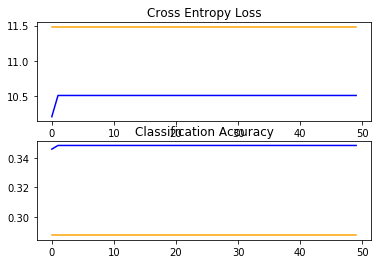

In [21]:
# learning curves
#from matplotlib import pyplot
#summarize_diagnostics(history)

# plot loss
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['acc'], color='blue', label='train')   # 'accuracy'
pyplot.plot(history.history['val_acc'], color='orange', label='test')
# save plot to file
#filename = sys.argv[0].split('/')[-1]
#pyplot.savefig(filename + '_plot.png')
#pyplot.close()

In [ ]:
# save model? -saving and loading a Keras model requires that the h5py library (HDF5 file format) is installed 
#!conda install h5py
#!pip install h5py 

import h5py
model.save('final_model.h5')

In [ ]:
### try different optimiser: Adam

In [5]:
### model 2
model = Sequential()

## CHANGE INPUT SHAPE, BASED ON RGB OR GRAYSCALE
# specify padding or not?
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))

#model.add(Dense(1, activation='sigmoid'))  ## CHANGE HERE, BASED ON NO. OF CLASSES
model.add(Dense(3, activation='softmax'))

# compile model
#opt = SGD(lr=0.001, momentum=0.9)
#model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])  ## CHANGE HERE, BASED ON NO. OF CLASSES
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

W1230 19:30:38.782941  8896 deprecation_wrapper.py:119] From C:\Users\DAR9KOR\AppData\Local\Continuum\anaconda3\envs\deep_learn\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1230 19:30:38.899724  8896 deprecation_wrapper.py:119] From C:\Users\DAR9KOR\AppData\Local\Continuum\anaconda3\envs\deep_learn\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1230 19:30:38.919617  8896 deprecation_wrapper.py:119] From C:\Users\DAR9KOR\AppData\Local\Continuum\anaconda3\envs\deep_learn\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1230 19:30:38.961873  8896 deprecation_wrapper.py:119] From C:\Users\DAR9KOR\AppData\Local\Continuum\anaconda3\envs\deep_learn\lib\site-packages\keras\backend\tensorflow_backe

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 200, 200, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 25, 25, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 80000)             0         
__________

In [6]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0,
                                   width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

## prepare iterators       ## CHANGE class_mode, BASED ON NO. OF CLASSES
#train_it = train_datagen.flow_from_directory('dataset_dogs_vs_cats/train/',
#                                             class_mode='binary', batch_size=64, target_size=(200, 200))
#test_it = test_datagen.flow_from_directory('dataset_dogs_vs_cats/test/',
#                                           class_mode='binary', batch_size=64, target_size=(200, 200))    
train_it = train_datagen.flow_from_directory('./57398/ZooScanSet/runData/train/', color_mode='grayscale',
                                             class_mode='categorical', batch_size=64, target_size=(200, 200))
test_it = test_datagen.flow_from_directory('./57398/ZooScanSet/runData/test/', color_mode='grayscale',
                                           class_mode='categorical', batch_size=64, target_size=(200, 200))

# fit model
history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
                              validation_data=test_it, validation_steps=len(test_it), epochs=50, verbose=1)

Found 2007 images belonging to 3 classes.
Found 219 images belonging to 3 classes.


W1230 19:33:31.857776  8896 deprecation.py:323] From C:\Users\DAR9KOR\AppData\Local\Continuum\anaconda3\envs\deep_learn\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1230 19:33:32.193625  8896 deprecation_wrapper.py:119] From C:\Users\DAR9KOR\AppData\Local\Continuum\anaconda3\envs\deep_learn\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/50
32/32 [==============================] - 207s 6s/step - loss: 10.7346 - acc: 0.3174 - val_loss: 10.4510 - val_acc: 0.3516
Epoch 2/50
32/32 [==============================] - 198s 6s/step - loss: 11.0738 - acc: 0.3130 - val_loss: 10.4510 - val_acc: 0.3516
Epoch 3/50
32/32 [==============================] - 194s 6s/step - loss: 11.1146 - acc: 0.3104 - val_loss: 10.4510 - val_acc: 0.3516
Epoch 4/50
32/32 [==============================] - 173s 5s/step - loss: 11.0874 - acc: 0.3121 - val_loss: 10.4510 - val_acc: 0.3516
Epoch 5/50
32/32 [==============================] - 194s 6s/step - loss: 11.0874 - acc: 0.3121 - val_loss: 10.4510 - val_acc: 0.3516
Epoch 6/50
32/32 [==============================] - 208s 6s/step - loss: 11.0738 - acc: 0.3130 - val_loss: 10.4510 - val_acc: 0.3516
Epoch 7/50
32/32 [==============================] - 177s 6s/step - loss: 11.1282 - acc: 0.3096 - val_loss: 10.4510 - val_acc: 0.3516
Epoch 8/50
32/32 [==============================] - 128s 4s/step - lo

In [7]:
# evaluate model
_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=1)
print('> %.3f' % (acc * 100.0))

4/4 [==============================] - 6s 1s/step
> 33.790


In [8]:
print(len(train_it))  # this is the no. of iterations per epoch = train_data_size/ batch_size

32


In [9]:
len(test_it)

4

In [10]:
model.evaluate_generator(test_it, steps=len(test_it), verbose=1)

4/4 [==============================] - 4s 988ms/step


[10.156608124301858, 0.3698630139027556]

In [ ]:
### round 2 : try different model ####

In [11]:
### model 3
from keras.layers import Dropout
# different architecture with less parameters; dropout in last layer

model = Sequential()

## CHANGE INPUT SHAPE, BASED ON RGB OR GRAYSCALE
# specify padding or not?
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 1)))
model.add(MaxPooling2D((2, 2)))
#model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
#model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
#model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))

#model.add(Dense(1, activation='sigmoid'))  ## CHANGE HERE, BASED ON NO. OF CLASSES
model.add(Dense(3, activation='softmax'))

# compile model
opt = SGD(lr=0.001, momentum=0.9)
#model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])  ## CHANGE HERE, BASED ON NO. OF CLASSES
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

W0103 16:38:27.161437  8896 deprecation.py:506] From C:\Users\DAR9KOR\AppData\Local\Continuum\anaconda3\envs\deep_learn\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 200, 200, 32)      320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 100, 100, 32)      9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 40000)             0         
__________

In [12]:
# create data generators
train_datagen = ImageDataGenerator(rescale=1.0/255.0,
                                   width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

## prepare iterators       ## CHANGE class_mode, BASED ON NO. OF CLASSES
#train_it = train_datagen.flow_from_directory('dataset_dogs_vs_cats/train/',
#                                             class_mode='binary', batch_size=64, target_size=(200, 200))
#test_it = test_datagen.flow_from_directory('dataset_dogs_vs_cats/test/',
#                                           class_mode='binary', batch_size=64, target_size=(200, 200))    
train_it = train_datagen.flow_from_directory('./57398/ZooScanSet/runData/train/', color_mode='grayscale',
                                             class_mode='categorical', batch_size=64, target_size=(200, 200))
test_it = test_datagen.flow_from_directory('./57398/ZooScanSet/runData/test/', color_mode='grayscale',
                                           class_mode='categorical', batch_size=64, target_size=(200, 200))


# fit model
history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
                              validation_data=test_it, validation_steps=len(test_it), epochs=50, verbose=1)
# started ~ 4:39pm

Found 2007 images belonging to 3 classes.
Found 219 images belonging to 3 classes.
Epoch 1/50
32/32 [==============================] - 93s 3s/step - loss: 1.2386 - acc: 0.3571 - val_loss: 1.0484 - val_acc: 0.4977
Epoch 2/50
32/32 [==============================] - 105s 3s/step - loss: 1.0040 - acc: 0.4406 - val_loss: 0.8397 - val_acc: 0.6530
Epoch 3/50
32/32 [==============================] - 114s 4s/step - loss: 0.8646 - acc: 0.5088 - val_loss: 0.6558 - val_acc: 0.6027
Epoch 4/50
32/32 [==============================] - 122s 4s/step - loss: 0.8207 - acc: 0.5459 - val_loss: 0.7637 - val_acc: 0.6073
Epoch 5/50
32/32 [==============================] - 165s 5s/step - loss: 0.8409 - acc: 0.5278 - val_loss: 0.6949 - val_acc: 0.5616
Epoch 6/50
32/32 [==============================] - 143s 4s/step - loss: 0.8533 - acc: 0.5361 - val_loss: 0.7087 - val_acc: 0.5753
Epoch 7/50
32/32 [==============================] - 125s 4s/step - loss: 0.8593 - acc: 0.5199 - val_loss: 0.7843 - val_acc: 0.6164
E

In [13]:
from datetime import datetime
datetime.now().strftime('%Y-%m-%d %H:%M:%S')

'2020-01-03 18:31:42'

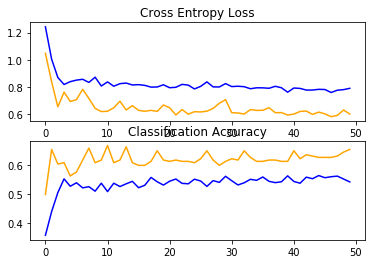

In [15]:
from matplotlib import pyplot
# plot loss
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['acc'], color='blue', label='train')   # 'accuracy'
pyplot.plot(history.history['val_acc'], color='orange', label='test')

In [16]:
# model 4:  dropout in all layers
model = Sequential()

## CHANGE INPUT SHAPE, BASED ON RGB OR GRAYSCALE
# specify padding or not?
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))

#model.add(Dense(1, activation='sigmoid'))  ## CHANGE HERE, BASED ON NO. OF CLASSES
model.add(Dense(3, activation='softmax'))

# compile model
opt = SGD(lr=0.001, momentum=0.9)
#model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])  ## CHANGE HERE, BASED ON NO. OF CLASSES
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 200, 200, 32)      320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 100, 100, 32)      9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 50, 50, 64)        18496     
__________

In [17]:
datetime.now().strftime('%Y-%m-%d %H:%M:%S')

'2020-01-03 18:47:43'

In [18]:
# fit model
history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
                              validation_data=test_it, validation_steps=len(test_it), epochs=20, verbose=1)

Epoch 1/20
32/32 [==============================] - 109s 3s/step - loss: 1.2609 - acc: 0.3275 - val_loss: 1.0982 - val_acc: 0.3699
Epoch 2/20
32/32 [==============================] - 107s 3s/step - loss: 1.0987 - acc: 0.3415 - val_loss: 1.0985 - val_acc: 0.3653
Epoch 3/20
32/32 [==============================] - 106s 3s/step - loss: 1.0984 - acc: 0.3410 - val_loss: 1.0988 - val_acc: 0.3653
Epoch 4/20
32/32 [==============================] - 105s 3s/step - loss: 1.0976 - acc: 0.3536 - val_loss: 1.0998 - val_acc: 0.3607
Epoch 5/20
32/32 [==============================] - 105s 3s/step - loss: 1.0990 - acc: 0.3379 - val_loss: 1.1002 - val_acc: 0.2877
Epoch 6/20
32/32 [==============================] - 116s 4s/step - loss: 1.0979 - acc: 0.3496 - val_loss: 1.0985 - val_acc: 0.3014
Epoch 7/20
32/32 [==============================] - 122s 4s/step - loss: 1.0978 - acc: 0.3437 - val_loss: 1.1011 - val_acc: 0.2785
Epoch 8/20
32/32 [==============================] - 108s 3s/step - loss: 1.0978 - a

In [19]:
datetime.now().strftime('%Y-%m-%d %H:%M:%S')

'2020-01-03 19:25:33'

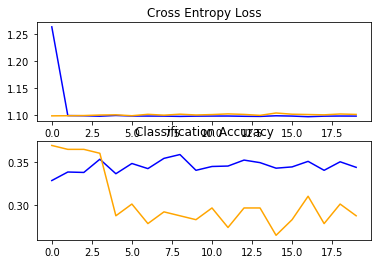

In [20]:
# plot loss
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['acc'], color='blue', label='train')   # 'accuracy'
pyplot.plot(history.history['val_acc'], color='orange', label='test')

In [1]:
1.0/255

0.00392156862745098

In [2]:
1.0/255.0

0.00392156862745098

In [3]:
1./255

0.00392156862745098

In [4]:
1/255

0.00392156862745098

In [ ]:
### check as transfer learning, saving images as RGB

# see the values in the other channels - explore_plankton_imgs.ipynb

# img = Image.open('./57398/ZooScanSet/runData_RGB/train/Acantharea/42738931.jpg')
# get pixel values
# list(img.getdata())  -> here we see tuples of 3 values, with same value repeated in all 3 channels

In [3]:
## model 5: transfer learning with vgg16

import sys
#from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.
C:\Users\DAR9KOR\AppData\Local\Continuum\anaconda3\envs\deep_learn\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\DAR9KOR\AppData\Local\Continuum\anaconda3\envs\deep_learn\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\DAR9KOR\AppData\Local\Continuum\anaconda3\envs\deep_learn\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np

In [4]:
# define model
def define_model():
    # load model
    model = VGG16(include_top=False, input_shape=(224, 224, 3)) 
    # set include_top=False to leave out the top layer for re-training to our use case
    # we can specify input_shape as per original images used to train VGG - then we have to preprocess our images
    # otherwise, we can specify the shape of our images
    
    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = False
    
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    #output = Dense(1, activation='sigmoid')(class1)
    output = Dense(3, activation='softmax')(class1)
    
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    #model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [28]:
def summarize_diagnostics(history):
    # plot loss
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['acc'], color='blue', label='train')   # 'accuracy'
    plt.plot(history.history['val_acc'], color='orange', label='test')
    plt.show()
    # save plot to file
    #filename = sys.argv[0].split('/')[-1]
    #pyplot.savefig(filename + '_plot.png')
    #plt.close()

In [6]:
# define model
model = define_model()

W0212 17:22:59.064489 12128 deprecation_wrapper.py:119] From C:\Users\DAR9KOR\AppData\Local\Continuum\anaconda3\envs\deep_learn\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0212 17:22:59.111371 12128 deprecation_wrapper.py:119] From C:\Users\DAR9KOR\AppData\Local\Continuum\anaconda3\envs\deep_learn\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0212 17:22:59.126982 12128 deprecation_wrapper.py:119] From C:\Users\DAR9KOR\AppData\Local\Continuum\anaconda3\envs\deep_learn\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0212 17:22:59.189471 12128 deprecation_wrapper.py:119] From C:\Users\DAR9KOR\AppData\Local\Continuum\anaconda3\envs\deep_learn\lib\site-packages\keras\backend\tensorflow_backe

58892288/58889256 [==============================] - 319s 5us/step


W0212 17:28:26.586015 12128 deprecation_wrapper.py:119] From C:\Users\DAR9KOR\AppData\Local\Continuum\anaconda3\envs\deep_learn\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0212 17:28:26.586015 12128 deprecation_wrapper.py:119] From C:\Users\DAR9KOR\AppData\Local\Continuum\anaconda3\envs\deep_learn\lib\site-packages\keras\backend\tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0212 17:28:27.288995 12128 deprecation_wrapper.py:119] From C:\Users\DAR9KOR\AppData\Local\Continuum\anaconda3\envs\deep_learn\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [ ]:
'''
# create data generator
datagen = ImageDataGenerator(featurewise_center=True)

# specify imagenet mean values for centering
datagen.mean = [123.68, 116.779, 103.939]
# prepare iterator
train_it = datagen.flow_from_directory('dataset_dogs_vs_cats/train/', 
                                       class_mode='binary', batch_size=64, target_size=(224, 224))
test_it = datagen.flow_from_directory('dataset_dogs_vs_cats/test/',
                                      class_mode='binary', batch_size=64, target_size=(224, 224))

'''

In [4]:
from keras.applications.vgg16 import preprocess_input

# create data generator;
# preprocess_input subtracts the mean RGB channels of the imagenet dataset. This is because the model you are
# using has been trained on a different dataset
datagen = ImageDataGenerator(featurewise_center=True, preprocessing_function = preprocess_input)
# https://github.com/keras-team/keras/issues/9624
# https://stackoverflow.com/questions/47555829/preprocess-input-method-in-keras   
# https://machinelearningmastery.com/use-pre-trained-vgg-model-classify-objects-photographs/
# google: using preprocess_input with datagen; preprocess_input keras vgg16
# is image scaling not required in transfer learning?

# specify imagenet mean values for centering
#datagen.mean = [123.68, 116.779, 103.939]

# prepare iterator
train_it = datagen.flow_from_directory('./57398/ZooScanSet/runData_RGB/train/', #color_mode='grayscale',
                                       class_mode='categorical', batch_size=64, target_size=(224, 224))
test_it = datagen.flow_from_directory('./57398/ZooScanSet/runData_RGB/test/', #color_mode='grayscale',
                                      class_mode='categorical', batch_size=64, target_size=(224, 224))


Found 1984 images belonging to 3 classes.
Found 242 images belonging to 3 classes.


In [8]:
test_it

In [9]:
test_it.filenames

['Acantharea\\42754317.jpg',
 'Acantharea\\42762293.jpg',
 'Acantharea\\42829606.jpg',
 'Acantharea\\43045506.jpg',
 'Acantharea\\44722585.jpg',
 'Acantharea\\44726541.jpg',
 'Acantharea\\44726551.jpg',
 'Acantharea\\44726732.jpg',
 'Acantharea\\44726787.jpg',
 'Acantharea\\44726845.jpg',
 'Acantharea\\44727001.jpg',
 'Acantharea\\44727076.jpg',
 'Acantharea\\44727383.jpg',
 'Acantharea\\44727551.jpg',
 'Acantharea\\44733429.jpg',
 'Acantharea\\44735737.jpg',
 'Acantharea\\44737351.jpg',
 'Acantharea\\44740649.jpg',
 'Acantharea\\44740784.jpg',
 'Acantharea\\44740940.jpg',
 'Acantharea\\44744190.jpg',
 'Acantharea\\44744366.jpg',
 'Acantharea\\44746066.jpg',
 'Acantharea\\44751867.jpg',
 'Acantharea\\44761696.jpg',
 'Acantharea\\44765985.jpg',
 'Acantharea\\44766207.jpg',
 'Acantharea\\44766598.jpg',
 'Acantharea\\44767464.jpg',
 'Acantharea\\44767483.jpg',
 'Acantharea\\44767603.jpg',
 'Acantharea\\44767934.jpg',
 'Acantharea\\44777187.jpg',
 'Acantharea\\44782889.jpg',
 'Acantharea\\

In [10]:
test_it.filenames

['Acantharea\\42754317.jpg',
 'Acantharea\\42762293.jpg',
 'Acantharea\\42829606.jpg',
 'Acantharea\\43045506.jpg',
 'Acantharea\\44722585.jpg',
 'Acantharea\\44726541.jpg',
 'Acantharea\\44726551.jpg',
 'Acantharea\\44726732.jpg',
 'Acantharea\\44726787.jpg',
 'Acantharea\\44726845.jpg',
 'Acantharea\\44727001.jpg',
 'Acantharea\\44727076.jpg',
 'Acantharea\\44727383.jpg',
 'Acantharea\\44727551.jpg',
 'Acantharea\\44733429.jpg',
 'Acantharea\\44735737.jpg',
 'Acantharea\\44737351.jpg',
 'Acantharea\\44740649.jpg',
 'Acantharea\\44740784.jpg',
 'Acantharea\\44740940.jpg',
 'Acantharea\\44744190.jpg',
 'Acantharea\\44744366.jpg',
 'Acantharea\\44746066.jpg',
 'Acantharea\\44751867.jpg',
 'Acantharea\\44761696.jpg',
 'Acantharea\\44765985.jpg',
 'Acantharea\\44766207.jpg',
 'Acantharea\\44766598.jpg',
 'Acantharea\\44767464.jpg',
 'Acantharea\\44767483.jpg',
 'Acantharea\\44767603.jpg',
 'Acantharea\\44767934.jpg',
 'Acantharea\\44777187.jpg',
 'Acantharea\\44782889.jpg',
 'Acantharea\\

In [21]:
from datetime import datetime
print(datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

2020-02-12 17:55:23


In [22]:
# fit model
history = model.fit_generator(train_it, steps_per_epoch=len(train_it), validation_data=test_it, 
                              validation_steps=len(test_it),
                              epochs=10, verbose=1)

# 1121s/60 = 18.68

Epoch 1/10
31/31 [==============================] - 1121s 36s/step - loss: 0.4369 - acc: 0.9249 - val_loss: 0.0672 - val_acc: 0.9793
Epoch 2/10
31/31 [==============================] - 1084s 35s/step - loss: 0.1022 - acc: 0.9829 - val_loss: 0.0073 - val_acc: 1.0000
Epoch 3/10
31/31 [==============================] - 1088s 35s/step - loss: 0.0317 - acc: 0.9909 - val_loss: 0.0348 - val_acc: 0.9835
Epoch 4/10
31/31 [==============================] - 1075s 35s/step - loss: 0.0039 - acc: 0.9985 - val_loss: 0.0288 - val_acc: 0.9835
Epoch 5/10
31/31 [==============================] - 2213s 71s/step - loss: 0.0089 - acc: 0.9995 - val_loss: 0.0172 - val_acc: 0.9876
Epoch 6/10
31/31 [==============================] - 712s 23s/step - loss: 0.0166 - acc: 0.9990 - val_loss: 0.0103 - val_acc: 0.9917
Epoch 7/10
31/31 [==============================] - 684s 22s/step - loss: 0.0084 - acc: 0.9995 - val_loss: 0.0223 - val_acc: 0.9835
Epoch 8/10
31/31 [==============================] - 681s 22s/step - los

In [23]:
print(datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

2020-02-12 20:42:39


In [24]:
print(len(train_it))  # this is the no. of iterations per epoch = train_data_size/ batch_size

31


In [25]:
len(test_it)

4

In [26]:
# evaluate model
_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
print('> %.3f' % (acc * 100.0))

> 99.174


In [11]:
model.evaluate_generator(test_it, steps=len(test_it))

[0.011569706720207656, 0.9917355327566794]

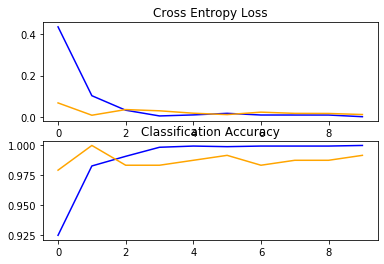

In [29]:
# learning curves
summarize_diagnostics(history)

In [47]:
## save model after training

import h5py
model.save('final_model.h5')

In [5]:
## load model

from keras.models import load_model 
model = load_model('final_model.h5')

W0213 12:48:05.037559  4864 deprecation_wrapper.py:119] From C:\Users\DAR9KOR\AppData\Local\Continuum\anaconda3\envs\deep_learn\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0213 12:48:05.106524  4864 deprecation_wrapper.py:119] From C:\Users\DAR9KOR\AppData\Local\Continuum\anaconda3\envs\deep_learn\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0213 12:48:05.169055  4864 deprecation_wrapper.py:119] From C:\Users\DAR9KOR\AppData\Local\Continuum\anaconda3\envs\deep_learn\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0213 12:48:05.744689  4864 deprecation_wrapper.py:119] From C:\Users\DAR9KOR\AppData\Local\Continuum\anaconda3\envs\deep_learn\lib\site-packages\keras\backend\tensorflow_backend.py:174: The nam

In [23]:
## obtaining conf mat & other metrics
# https://gist.github.com/RyanAkilos/3808c17f79e77c4117de35aa68447045
# https://stackoverflow.com/questions/45413712/keras-get-true-labels-y-test-from-imagedatagenerator-or-predict-generator

from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, classification_report
# https://www.tensorflow.org/api_docs/python/tf/keras/metrics

#print(classification_report(y_test, y_pred, target_names=class_names))
#confusion_matrix(y_test, y_pred)
#print(classification_report(y_test, y_pred, target_names=class_names))

In [42]:
%pip install sklearn

  Using cached https://files.pythonhosted.org/packages/1e/7a/dbb3be0ce9bd5c8b7e3d87328e79063f8b263b2b1bfa4774cb1147bfcd3f/sklearn-0.0.tar.gz
  Using cached https://files.pythonhosted.org/packages/28/5c/cf6a2b65a321c4a209efcdf64c2689efae2cb62661f8f6f4bb28547cf1bf/joblib-0.14.1-py2.py3-none-any.whl
  Stored in directory: C:\Users\DAR9KOR\AppData\Local\pip\Cache\wheels\76\03\bb\589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [ ]:
### check performance on validation set, since no separate test set at the moment

# https://gist.github.com/RyanAkilos/3808c17f79e77c4117de35aa68447045#gistcomment-3176016
# https://github.com/keras-team/keras/issues/6499
# https://github.com/keras-team/keras/issues/5162
# https://stackoverflow.com/questions/37981913/keras-how-to-predict-classes-in-order
# https://gist.github.com/RyanAkilos/3808c17f79e77c4117de35aa68447045
# https://stackoverflow.com/questions/45413712/keras-get-true-labels-y-test-from-imagedatagenerator-or-predict-generator


In [31]:
'''# y_test
test_it.classes'''

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [39]:
'''test_it.classes'''

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [32]:
'''# y_pred Prob
model.predict_generator(test_it, steps=len(test_it))'''

array([[9.97082531e-01, 2.91749882e-03, 8.12478765e-11],
       [2.51563756e-17, 4.24674811e-19, 1.00000000e+00],
       [1.60819654e-05, 7.71228503e-09, 9.99983907e-01],
       [6.62128408e-15, 9.74383703e-21, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.90937044e-09, 8.94018800e-13, 1.00000000e+00],
       [1.89269642e-11, 1.40046839e-16, 1.00000000e+00],
       [6.06361295e-10, 3.09922506e-17, 1.00000000e+00],
       [1.94305822e-18, 5.88632181e-25, 1.00000000e+00],
       [3.15377291e-19, 1.69101565e-23, 1.00000000e+00],
       [5.69667501e-24, 1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.76215475e-09, 1.91193217e-09],
       [9.99941587e-01, 5.83633482e-05, 7.84805665e-10],
       [2.15500833e-07, 9.99999762e-01, 2.13256876e-16],
       [9.99999881e-01, 8.91645371e-08, 7.04988233e-14],
       [1.00000000e+00, 2.77729944e-18, 3.24057402e-23],
       [3.93404466e-13, 1.00000000e+00, 2.28303237e-22],
       [1.00000000e+00, 1.13960

In [6]:
''' # order keeps changing everytime
model.predict_generator(test_it, steps=len(test_it))'''

C:\Users\DAR9KOR\AppData\Local\Continuum\anaconda3\envs\deep_learn\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


array([[1.33610722e-08, 1.03493289e-14, 1.00000000e+00],
       [9.99999881e-01, 7.04544121e-08, 2.60914268e-09],
       [9.99999166e-01, 8.13641066e-07, 2.52229212e-19],
       [1.00000000e+00, 1.55250252e-24, 1.58430576e-33],
       [3.11605911e-13, 9.36138828e-18, 1.00000000e+00],
       [1.20205454e-08, 5.09271228e-13, 1.00000000e+00],
       [9.75133307e-09, 1.00000000e+00, 1.86607976e-16],
       [1.94305822e-18, 5.88632181e-25, 1.00000000e+00],
       [1.11578549e-14, 1.00000000e+00, 8.04838001e-25],
       [1.00000000e+00, 8.71219221e-13, 6.30795230e-17],
       [9.95164037e-01, 4.83593903e-03, 3.76872769e-11],
       [4.84909223e-17, 2.86669939e-23, 1.00000000e+00],
       [1.00000000e+00, 1.40799211e-27, 1.61520499e-37],
       [3.39759071e-03, 9.96602416e-01, 2.51254907e-16],
       [2.27536241e-12, 1.65330000e-15, 1.00000000e+00],
       [1.00000000e+00, 7.15658505e-11, 4.28597665e-16],
       [9.99999881e-01, 8.91645371e-08, 7.04988233e-14],
       [2.95724178e-19, 2.53765

In [33]:
model.predict_generator(test_it(shuffle=False), steps=len(test_it))

TypeError: 'DirectoryIterator' object is not callable

In [34]:
'''Y_pred = model.predict_generator(test_it, steps= len(test_it))  #num_of_test_samples // batch_size+1)'''

In [35]:
'''np.argmax(Y_pred, axis=1)'''  # np.argmax returns the index of the max. value in each row (axis=1)  

array([0, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 2, 1, 0, 1, 0, 2, 2, 0, 1, 2, 1,
       1, 0, 2, 1, 1, 1, 1, 0, 1, 0, 1, 1, 2, 2, 0, 0, 0, 1, 0, 0, 2, 0,
       1, 1, 2, 0, 1, 1, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 1, 2, 1, 2,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 2, 1, 2, 2, 1, 1, 1, 0, 1, 1, 0, 2, 1,
       2, 0, 1, 2, 0, 0, 1, 1, 0, 2, 1, 2, 1, 1, 0, 2, 0, 0, 2, 0, 2, 2,
       1, 2, 0, 0, 1, 2, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1, 2, 1, 1, 0, 0, 1,
       1, 2, 0, 0, 1, 2, 0, 0, 1, 1, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 1,
       2, 0, 0, 1, 2, 0, 1, 1, 0, 2, 0, 1, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0,
       0, 0, 0, 2, 1, 0, 2, 2, 0, 1, 1, 0, 0, 0, 2, 2, 1, 2, 2, 0, 2, 0,
       0, 1, 1, 2, 2, 0, 1, 0, 0, 1, 0, 1, 0, 1, 2, 1, 1, 1, 2, 0, 2, 2,
       1, 2, 2, 1, 1, 2, 1, 2, 0, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 1, 2, 1],
      dtype=int64)

In [7]:
'''np.argmax(model.predict_generator(test_it, steps= len(test_it)), axis=1)'''

array([0, 2, 0, 0, 1, 1, 0, 2, 2, 0, 1, 0, 0, 1, 1, 0, 1, 2, 2, 2, 0, 0,
       1, 1, 1, 2, 2, 2, 0, 2, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 0, 0, 0, 1,
       1, 0, 2, 0, 1, 2, 1, 1, 1, 2, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1,
       0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 1, 1, 2, 1, 0, 2, 2, 2, 2, 1,
       2, 0, 0, 0, 1, 2, 0, 2, 2, 1, 1, 2, 0, 0, 0, 0, 1, 0, 0, 2, 0, 2,
       0, 2, 2, 0, 2, 0, 0, 1, 1, 1, 0, 2, 1, 1, 0, 0, 2, 1, 0, 1, 0, 1,
       0, 0, 2, 0, 1, 0, 0, 1, 1, 1, 2, 1, 1, 1, 0, 2, 2, 2, 0, 1, 1, 0,
       0, 0, 1, 2, 0, 0, 1, 2, 1, 0, 1, 0, 2, 0, 1, 0, 0, 2, 0, 2, 2, 0,
       2, 0, 1, 1, 1, 2, 2, 2, 1, 0, 2, 2, 1, 1, 2, 0, 0, 1, 0, 2, 2, 2,
       0, 0, 0, 2, 0, 2, 0, 2, 0, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 2, 2, 1,
       2, 0, 0, 1, 1, 2, 2, 0, 2, 0, 1, 0, 2, 2, 2, 2, 0, 0, 0, 0, 1, 2],
      dtype=int64)

In [37]:
'''np.rint(Y_pred)'''

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0

In [38]:
'''y_pred = np.argmax(Y_pred, axis=1)'''

In [44]:
'''print(confusion_matrix(test_it.classes, y_pred))'''

[[31 30 28]
 [31 25 23]
 [28 23 23]]


In [46]:
'''target_names = ['Acantharea', 'Copilia', 'cypris']

print(classification_report(test_it.classes, y_pred, target_names=target_names))'''

              precision    recall  f1-score   support

  Acantharea       0.34      0.35      0.35        89
     Copilia       0.32      0.32      0.32        79
      cypris       0.31      0.31      0.31        74

    accuracy                           0.33       242
   macro avg       0.33      0.33      0.33       242
weighted avg       0.33      0.33      0.33       242



In [12]:
'''test_it.reset()'''

In [13]:
'''model.predict_generator(test_it, steps=len(test_it))'''

C:\Users\DAR9KOR\AppData\Local\Continuum\anaconda3\envs\deep_learn\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


array([[9.99996066e-01, 3.97998383e-06, 9.72937513e-16],
       [1.00000000e+00, 1.42422102e-10, 1.26676758e-09],
       [2.38070038e-06, 9.99997616e-01, 1.48757349e-14],
       [4.22742977e-13, 1.00000000e+00, 1.45926777e-20],
       [1.00000000e+00, 8.71219221e-13, 6.30795230e-17],
       [2.27536241e-12, 1.65330000e-15, 1.00000000e+00],
       [3.88636551e-13, 1.00000000e+00, 2.53314253e-26],
       [9.99998808e-01, 1.16053104e-06, 7.94017689e-24],
       [7.32195256e-19, 3.99291350e-23, 1.00000000e+00],
       [6.44243731e-16, 1.00000000e+00, 6.86212225e-32],
       [9.99901175e-01, 9.88272586e-05, 5.00837241e-15],
       [1.39785847e-16, 7.36896167e-14, 1.00000000e+00],
       [3.11605911e-13, 9.36138828e-18, 1.00000000e+00],
       [1.27842455e-07, 8.06809385e-15, 9.99999881e-01],
       [9.99998569e-01, 1.43538671e-06, 6.56225144e-17],
       [1.00000000e+00, 1.71362602e-09, 4.53444973e-22],
       [9.98821080e-01, 1.17889990e-03, 1.20222193e-10],
       [2.15945896e-02, 9.78405

In [14]:
'''np.argmax(model.predict_generator(test_it, steps= len(test_it)), axis=1)'''

array([2, 2, 2, 2, 2, 2, 1, 2, 0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 1, 2,
       1, 0, 2, 1, 0, 2, 0, 0, 0, 0, 2, 2, 1, 1, 0, 2, 2, 1, 0, 0, 2, 1,
       1, 0, 2, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 2, 2, 2, 1, 0, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 2, 0,
       2, 2, 1, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 0, 1, 1, 2, 1, 1, 2, 0,
       2, 1, 1, 0, 2, 1, 2, 1, 0, 1, 0, 0, 1, 2, 1, 2, 0, 2, 2, 0, 0, 0,
       2, 0, 1, 2, 0, 0, 1, 0, 0, 1, 0, 0, 1, 2, 0, 1, 0, 0, 0, 1, 1, 2,
       0, 0, 2, 0, 0, 2, 2, 2, 1, 2, 0, 1, 1, 1, 0, 2, 1, 1, 2, 1, 1, 2,
       0, 0, 1, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 1, 0, 2, 0, 2, 2, 2, 0, 0,
       2, 1, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 2, 0, 0, 0, 2, 1, 1, 0, 2, 1,
       1, 2, 0, 1, 2, 1, 2, 2, 1, 0, 1, 2, 1, 2, 0, 1, 1, 0, 1, 0, 0, 1],
      dtype=int64)

In [15]:
'''np.argmax(model.predict_generator(test_it, steps= len(test_it)), axis=1)'''

array([2, 2, 0, 0, 2, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 2, 0, 0, 2, 0, 0, 2,
       2, 2, 2, 1, 2, 1, 0, 0, 2, 0, 1, 1, 1, 0, 2, 2, 1, 0, 0, 2, 2, 2,
       2, 2, 2, 1, 1, 0, 2, 2, 2, 1, 0, 0, 2, 2, 1, 1, 0, 1, 2, 2, 0, 1,
       2, 0, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 2, 2, 1, 0, 1, 0, 2, 0, 2, 1,
       1, 2, 0, 1, 1, 2, 0, 0, 0, 2, 0, 2, 2, 1, 0, 2, 2, 1, 0, 1, 2, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1,
       0, 1, 0, 1, 0, 2, 2, 0, 1, 0, 0, 0, 2, 0, 1, 2, 1, 1, 0, 1, 2, 0,
       2, 2, 2, 0, 0, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 2, 1, 2, 0, 1,
       0, 2, 0, 0, 2, 0, 1, 0, 2, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 2, 1,
       0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 2, 2, 2,
       1, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 2, 1, 1, 2, 0, 2, 1, 1, 0, 0, 1],
      dtype=int64)

In [16]:
''' # simple re-setting does not work; need to set shuffle=False in the validation generator

test_it.reset()
np.argmax(model.predict_generator(test_it, steps= len(test_it)), axis=1)'''

array([0, 1, 1, 2, 0, 2, 2, 1, 1, 2, 0, 0, 0, 1, 1, 0, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 0, 2, 0, 1, 1, 0, 1, 0, 1, 0, 2, 0, 0, 2, 0, 2, 0, 2,
       1, 1, 2, 1, 1, 2, 0, 2, 2, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 2, 2, 2, 2, 1, 0, 1, 1, 0, 0, 0, 0, 2, 1, 2, 2, 0, 1,
       0, 1, 2, 2, 1, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0, 0,
       0, 2, 1, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 0, 2, 1, 0, 0, 2, 1,
       1, 1, 0, 2, 2, 1, 2, 0, 1, 0, 0, 0, 0, 1, 0, 2, 2, 0, 2, 0, 0, 0,
       1, 2, 1, 1, 1, 2, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0,
       1, 1, 0, 2, 2, 0, 2, 1, 2, 1, 1, 2, 0, 0, 2, 2, 1, 0, 1, 2, 0, 0,
       1, 1, 1, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 2, 2, 1, 2, 2,
       2, 2, 1, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 0, 2, 2, 2, 0, 2],
      dtype=int64)

In [18]:
# create generator with shuffle=False
validation_generator2 = datagen.flow_from_directory('./57398/ZooScanSet/runData_RGB/test/', #color_mode='grayscale',
                                      class_mode='categorical', batch_size=64, target_size=(224, 224), shuffle=False)


Found 242 images belonging to 3 classes.


In [19]:
# y_test  (actual labels)
validation_generator2.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [29]:
'''# y_pred
np.argmax(model.predict_generator(validation_generator2, steps= len(test_it)), axis=1)'''

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int64)

In [30]:
'''np.argmax(model.predict_generator(validation_generator2, steps= len(validation_generator2)), axis=1)'''

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [32]:
'''y_pred = np.argmax(model.predict_generator(validation_generator2, steps= len(validation_generator2)), axis=1)
y_pred'''

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [26]:
'''y_pred = np.argmax(model.predict_generator(validation_generator2, steps= len(test_it)), axis=1)'''

C:\Users\DAR9KOR\AppData\Local\Continuum\anaconda3\envs\deep_learn\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


In [27]:
'''print(confusion_matrix(test_it.classes, y_pred))'''

[[88  1  0]
 [ 2 77  0]
 [ 0  0 74]]


In [28]:
'''target_names = ['Acantharea', 'Copilia', 'cypris']
print(classification_report(test_it.classes, y_pred, target_names=target_names))'''

              precision    recall  f1-score   support

  Acantharea       0.98      0.99      0.98        89
     Copilia       0.99      0.97      0.98        79
      cypris       1.00      1.00      1.00        74

    accuracy                           0.99       242
   macro avg       0.99      0.99      0.99       242
weighted avg       0.99      0.99      0.99       242



In [33]:
# getting predicted labels y_pred
validation_generator2.reset() # resetting generator
y_pred = np.argmax(model.predict_generator(validation_generator2, steps= len(test_it)), axis=1)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int64)

In [34]:
# we need to create generator with shuffle=false & also reset it, before using predict_generator
validation_generator2.reset() # resetting generator
y_pred = np.argmax(model.predict_generator(validation_generator2, steps= len(test_it)), axis=1)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int64)

In [37]:
validation_generator2.filenames

['Acantharea\\42754317.jpg',
 'Acantharea\\42762293.jpg',
 'Acantharea\\42829606.jpg',
 'Acantharea\\43045506.jpg',
 'Acantharea\\44722585.jpg',
 'Acantharea\\44726541.jpg',
 'Acantharea\\44726551.jpg',
 'Acantharea\\44726732.jpg',
 'Acantharea\\44726787.jpg',
 'Acantharea\\44726845.jpg',
 'Acantharea\\44727001.jpg',
 'Acantharea\\44727076.jpg',
 'Acantharea\\44727383.jpg',
 'Acantharea\\44727551.jpg',
 'Acantharea\\44733429.jpg',
 'Acantharea\\44735737.jpg',
 'Acantharea\\44737351.jpg',
 'Acantharea\\44740649.jpg',
 'Acantharea\\44740784.jpg',
 'Acantharea\\44740940.jpg',
 'Acantharea\\44744190.jpg',
 'Acantharea\\44744366.jpg',
 'Acantharea\\44746066.jpg',
 'Acantharea\\44751867.jpg',
 'Acantharea\\44761696.jpg',
 'Acantharea\\44765985.jpg',
 'Acantharea\\44766207.jpg',
 'Acantharea\\44766598.jpg',
 'Acantharea\\44767464.jpg',
 'Acantharea\\44767483.jpg',
 'Acantharea\\44767603.jpg',
 'Acantharea\\44767934.jpg',
 'Acantharea\\44777187.jpg',
 'Acantharea\\44782889.jpg',
 'Acantharea\\

In [41]:
#### SEEING THE PREDICTIONS ####
# combine filename, y_test, y_pred into a df & flag mis-predictions

#dataf = pd.DataFrame([validation_generator2.filenames, validation_generator2.classes, y_pred]).T
dataf = pd.DataFrame(np.column_stack([validation_generator2.filenames, validation_generator2.classes, y_pred]),
                     columns=['name', 'true', 'pred'])
dataf.head(3)

,name,true,pred
0,Acantharea\42754317.jpg,0,0
1,Acantharea\42762293.jpg,0,0
2,Acantharea\42829606.jpg,0,0


In [42]:
dataf[dataf.true != dataf.pred]

,name,true,pred
34,Acantharea\44792936.jpg,0,1
108,Copilia\42980446.jpg,1,0
132,Copilia\45085140.jpg,1,0


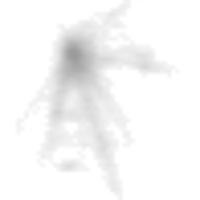

In [43]:
display(Image.open("./57398/ZooScanSet/runData_RGB/test/Acantharea/44792936.jpg"))

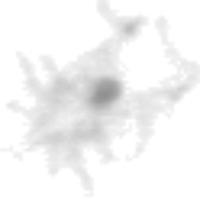

In [44]:
display(Image.open("./57398/ZooScanSet/runData_RGB/test/Copilia/42980446.jpg"))

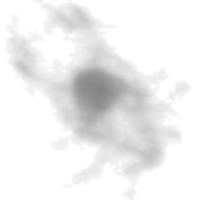

In [45]:
display(Image.open("./57398/ZooScanSet/runData_RGB/test/Copilia/45085140.jpg"))

In [48]:
## getting the probabilities in each predicted class, for each test image
validation_generator2.reset() # resetting generator
probs = pd.DataFrame(model.predict_generator(validation_generator2, steps= len(test_it)))
probs.head(3)

C:\Users\DAR9KOR\AppData\Local\Continuum\anaconda3\envs\deep_learn\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


,0,1,2
0,1.0,9.687737e-11,3.448527e-19
1,1.0,8.712192e-13,6.307952e-17
2,1.0,2.812393e-28,0.000000e+00


In [49]:
dataf = pd.concat([dataf,probs],axis=1)
dataf.head(3)

,name,true,pred,0,1,2
0,Acantharea\42754317.jpg,0,0,1.0,9.687737e-11,3.448527e-19
1,Acantharea\42762293.jpg,0,0,1.0,8.712192e-13,6.307952e-17
2,Acantharea\42829606.jpg,0,0,1.0,2.812393e-28,0.000000e+00


In [50]:
dataf[dataf.true != dataf.pred]

,name,true,pred,0,1,2
34,Acantharea\44792936.jpg,0,1,0.314500,0.685498,1.615021e-06
108,Copilia\42980446.jpg,1,0,0.685614,0.314386,1.579033e-08
132,Copilia\45085140.jpg,1,0,0.697912,0.302088,3.213106e-07


In [35]:
## performance metrics

print(confusion_matrix(validation_generator2.classes, y_pred))

[[88  1  0]
 [ 2 77  0]
 [ 0  0 74]]


In [36]:
target_names = ['Acantharea', 'Copilia', 'cypris']
print(classification_report(validation_generator2.classes, y_pred, target_names=target_names))

              precision    recall  f1-score   support

  Acantharea       0.98      0.99      0.98        89
     Copilia       0.99      0.97      0.98        79
      cypris       1.00      1.00      1.00        74

    accuracy                           0.99       242
   macro avg       0.99      0.99      0.99       242
weighted avg       0.99      0.99      0.99       242



In [ ]:
## predicting on new test data, without labels
# https://datascience.stackexchange.com/questions/13894/how-to-get-predictions-with-predict-generator-on-streaming-test-data-in-keras